In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [20]:
df_merged = pd.read_csv('ml_intro_my_metrics.csv').set_index('element_id')
df_merged

,mean_tries_count,tries_std,skips_percentage,lost_percentage,guessed_percentage
element_id,,,,,
22099,1.617647,1.859923,0.025043,NaN,0.010695
22100,1.244648,1.730658,0.027610,0.012097,0.003058
22101,1.140187,0.609025,0.006040,0.012245,0.000000
22102,1.256250,1.207328,0.004303,0.010309,0.006250
22110,2.324517,3.844413,0.042656,NaN,0.011190
...,...,...,...,...,...
34797,2.142968,2.503602,0.047573,NaN,0.005410
34799,1.254967,0.861443,0.111852,0.594918,0.000000
34885,2.140244,2.655905,0.029412,0.309524,0.000000


### Связи

In [48]:
mean_tries_threshold = 4
tries_std_threshold = 5
skips_percentage_threshold = 0.2
lost_percentage_threshold = 0.15
guessed_percentage_threshold = 0.2

In [51]:
from tabulate import tabulate

In [52]:
thresholds={'mean_tries_count': mean_tries_threshold, 'tries_std': tries_std_threshold, 
           'skips_percentage': skips_percentage_threshold, 'lost_percentage': lost_percentage_threshold,
           'guessed_percentage': guessed_percentage_threshold}
dataframes={'mean_tries_count': mean_tries, 'tries_std': tries_std, 
           'skips_percentage': skips_percentage, 'lost_percentage': lost_percentage,
           'guessed_percentage': guessed_percentage}

In [55]:
def study_correlation(x_df: pd.DataFrame, y_df: pd.DataFrame, x_name, y_name, x_critical, y_critical):
    print(f'Metrics: {x_name}, {y_name}')
    x = x_df[x_name]
    y = y_df[y_name]
    
    fig, ax = plt.subplots()
    sns.scatterplot(x=x, y=y, ax=ax)
    plt.axhline(y=y_critical, color="g")
    plt.axvline(x=x_critical, color="g")
    plt.xlabel(x_name)
    plt.ylabel(y_name);

    print(f'Pearson correlation coefficient = {x.corr(y)}')
    print('Amount by segments:')
    df = x_df.merge(y_df, left_index=True, right_index=True)
    left_up = len(df[(df[x_name] <= x_critical) & (df[y_name] > y_critical)])
    left_down = len(df[(df[x_name] <= x_critical) & (df[y_name] <= y_critical)])
    right_up = len(df[(df[x_name] > x_critical) & (df[y_name] > y_critical)])
    right_down = len(df[(df[x_name] > x_critical) & (df[y_name] <= y_critical)])
    print(tabulate([[left_up, right_up], [left_down, right_down]], tablefmt='fancy_grid'))

In [56]:
def study_correlation(x_name, y_name):
    print(f'Metrics: {x_name}, {y_name}')
    x_df = dataframes[x_name]
    y_df = dataframes[y_name]
    x = x_df[x_name]
    y = y_df[y_name]
    x_critical = thresholds[x_name]
    y_critical = thresholds[y_name]
    
    fig, ax = plt.subplots()
    sns.scatterplot(x=x, y=y, ax=ax)
    plt.axhline(y=y_critical, color="g")
    plt.axvline(x=x_critical, color="g")
    plt.xlabel(x_name)
    plt.ylabel(y_name);

    print(f'Pearson correlation coefficient = {x.corr(y)}')
    print('Amount by segments:')
    df = x_df.merge(y_df, left_index=True, right_index=True)
    left_up = len(df[(df[x_name] <= x_critical) & (df[y_name] > y_critical)])
    left_down = len(df[(df[x_name] <= x_critical) & (df[y_name] <= y_critical)])
    right_up = len(df[(df[x_name] > x_critical) & (df[y_name] > y_critical)])
    right_down = len(df[(df[x_name] > x_critical) & (df[y_name] <= y_critical)])
    print(tabulate([[left_up, right_up], [left_down, right_down]], tablefmt='fancy_grid'))

In [57]:
x_name='mean_tries_count'
y_name='skips_percentage'
x = dataframes[x_name][x_name]
y = dataframes[y_name][y_name]
x_critical = thresholds[x_name]
y_critical = thresholds[y_name]

In [58]:
y

course_element_id
22092    0.009169
22096    0.004890
22097    0.012225
22098    0.000000
22099    0.023994
           ...   
34799    0.102390
34885    0.022308
34886    0.153846
35055    0.158174
36670    0.004805
Name: skips_percentage, Length: 294, dtype: float64

### mean_tries

Metrics: mean_tries_count, tries_std
Pearson correlation coefficient = 0.5832518731458687
Amount by segments:
╒═════╤════╕
│   7 │ 51 │
├─────┼────┤
│ 220 │ 16 │
╘═════╧════╛


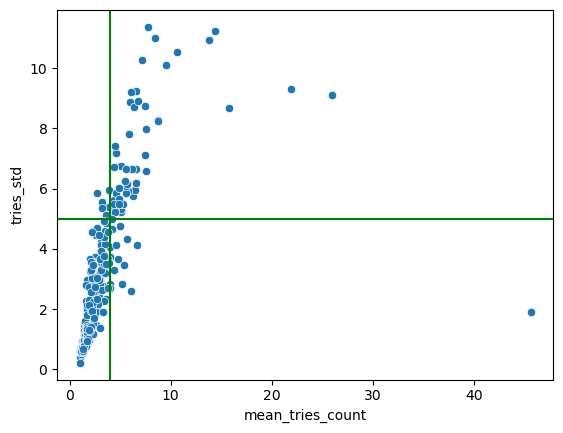

In [59]:
study_correlation('mean_tries_count', 'tries_std')

Metrics: mean_tries_count, skips_percentage
Pearson correlation coefficient = 0.08673352097884197
Amount by segments:
╒═════╤════╕
│  24 │  6 │
├─────┼────┤
│ 203 │ 61 │
╘═════╧════╛


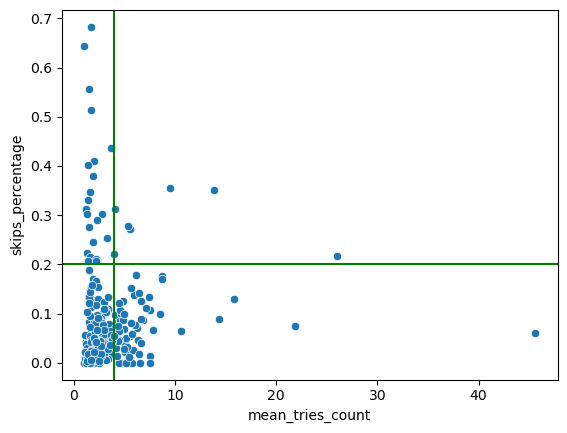

In [60]:
study_correlation('mean_tries_count', 'skips_percentage')

Metrics: mean_tries_count, lost_percentage
Pearson correlation coefficient = -0.006486206253732327
Amount by segments:
╒═════╤════╕
│  41 │ 11 │
├─────┼────┤
│ 109 │ 32 │
╘═════╧════╛


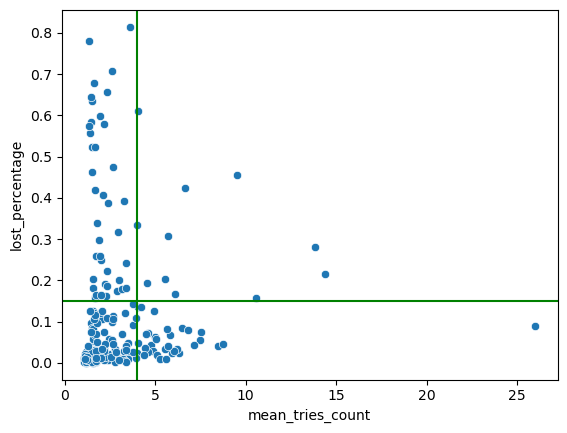

In [61]:
study_correlation('mean_tries_count', 'lost_percentage')

Metrics: mean_tries_count, guessed_percentage
Pearson correlation coefficient = 0.4467320451207694
Amount by segments:
╒═════╤════╕
│   1 │ 16 │
├─────┼────┤
│ 226 │ 51 │
╘═════╧════╛


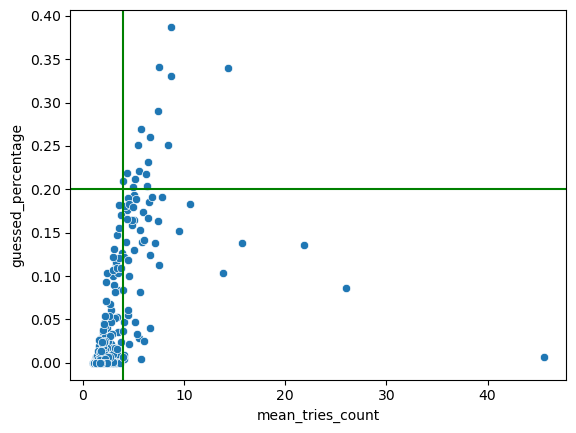

In [62]:
study_correlation('mean_tries_count', 'guessed_percentage')

### tries_std

Metrics: tries_std, guessed_percentage
Pearson correlation coefficient = 0.7835197201415011
Amount by segments:
╒═════╤════╕
│   2 │ 15 │
├─────┼────┤
│ 234 │ 43 │
╘═════╧════╛


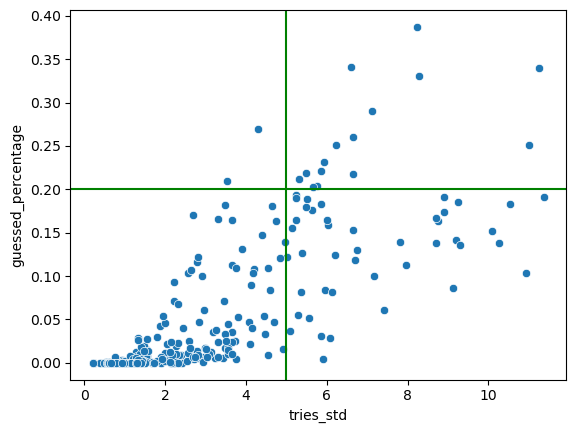

In [63]:
study_correlation('tries_std', 'guessed_percentage')

Metrics: tries_std, skips_percentage
Pearson correlation coefficient = 0.06957882245244475
Amount by segments:
╒═════╤════╕
│  25 │  5 │
├─────┼────┤
│ 211 │ 53 │
╘═════╧════╛


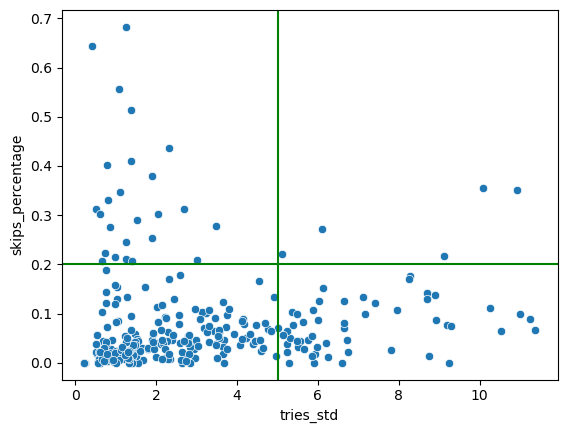

In [64]:
study_correlation('tries_std', 'skips_percentage')

Лево-верх: много пропускают, кто не пропустил - разброс попыток небольшой

Право-низ: мало пропусков, но кто-то делает сильно больше попыток, чем другие

Metrics: tries_std, lost_percentage
Pearson correlation coefficient = -0.13580088005970828
Amount by segments:
╒═════╤════╕
│  46 │  6 │
├─────┼────┤
│ 111 │ 30 │
╘═════╧════╛


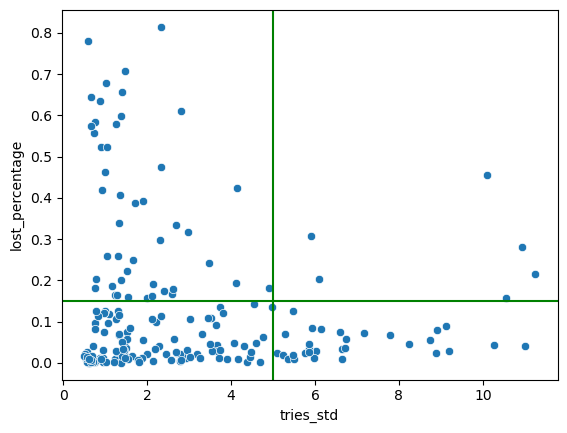

In [65]:
study_correlation('tries_std', 'lost_percentage')

### остальные

Metrics: skips_percentage, lost_percentage
Pearson correlation coefficient = 0.4099494645426565
Amount by segments:
╒═════╤════╕
│  41 │ 11 │
├─────┼────┤
│ 137 │  4 │
╘═════╧════╛


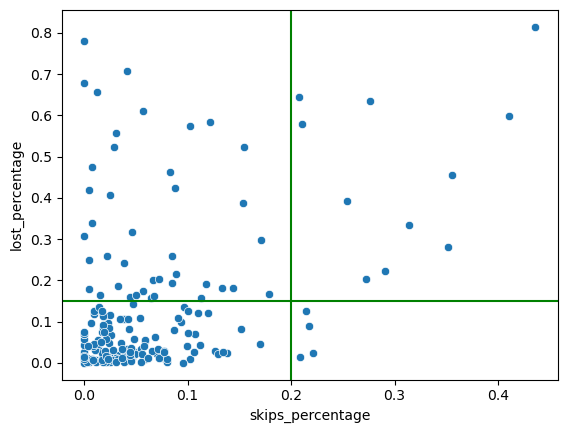

In [66]:
study_correlation('skips_percentage', 'lost_percentage')

Зависимость выше критического значения по skips похоже на квадратичную - стоит посмотреть на эту связь на бОльшем числе задач.

Metrics: skips_percentage, guessed_percentage
Pearson correlation coefficient = -0.035541734165133704
Amount by segments:
╒═════╤════╕
│  17 │  0 │
├─────┼────┤
│ 247 │ 30 │
╘═════╧════╛


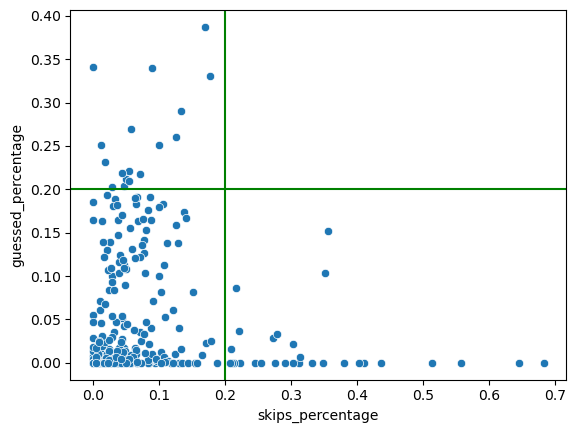

In [67]:
study_correlation('skips_percentage', 'guessed_percentage')

Metrics: lost_percentage, guessed_percentage
Pearson correlation coefficient = -0.2157485984898351
Amount by segments:
╒═════╤════╕
│  10 │  1 │
├─────┼────┤
│ 131 │ 51 │
╘═════╧════╛


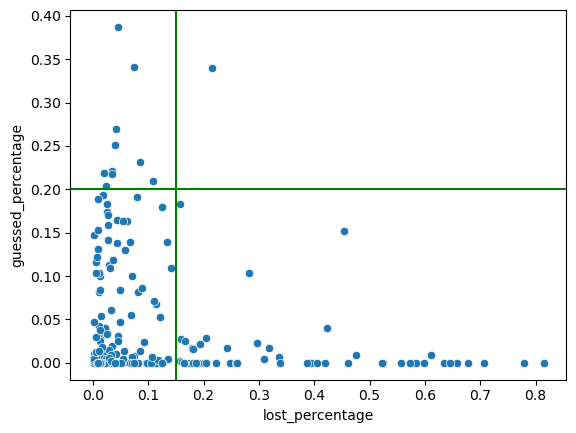

In [68]:
study_correlation('lost_percentage', 'guessed_percentage')

In [69]:
df_merged

,mean_tries_count,tries_std,skips_percentage,lost_percentage,guessed_percentage
course_element_id,,,,,
22092,1.712821,1.081184,0.009169,0.118734,0.000000
22096,2.000000,1.664125,0.004890,0.248394,0.000000
22097,1.814516,0.948361,0.012225,NaN,0.000000
22098,1.200573,0.572397,0.000000,0.025157,0.000000
22099,1.709972,1.519015,0.023994,NaN,0.015954
...,...,...,...,...,...
34799,1.334936,0.666329,0.102390,0.573565,0.000000
34885,1.951389,1.308774,0.022308,0.259958,0.000000
34886,2.384146,1.715581,0.153846,0.387097,0.000000


## Подсчет числа сложных задач

In [70]:
df_hard = pd.DataFrame(index=df_merged.index)
sum = pd.Series([0]*len(df_hard.index), index=df_hard.index)
for metric in df_merged.columns:
    df_hard[metric] = df_merged[metric] >= thresholds[metric]
    sum += df_hard[metric].astype(int)
df_hard['hard_count'] = sum
df_hard

,mean_tries_count,tries_std,skips_percentage,lost_percentage,guessed_percentage,hard_count
course_element_id,,,,,,
22092,False,False,False,False,False,0
22096,False,False,False,True,False,1
22097,False,False,False,False,False,0
22098,False,False,False,False,False,0
22099,False,False,False,False,False,0
...,...,...,...,...,...,...
34799,False,False,False,True,False,1
34885,False,False,False,True,False,1
34886,False,False,False,True,False,1


<Axes: ylabel='Count'>

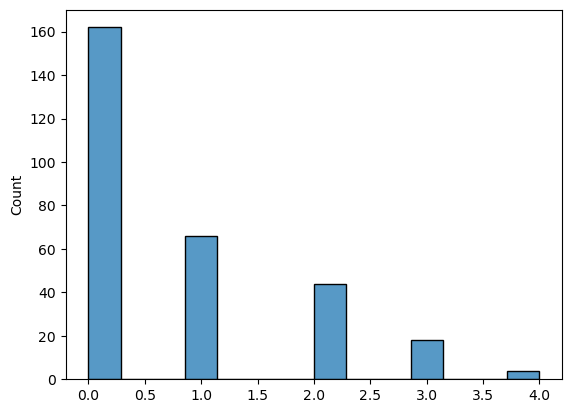

In [71]:
sns.histplot(sum)

In [72]:
# количество сложных только по lost_percentage
len(df_hard[(df_hard['lost_percentage']) & (~df_hard['mean_tries_count']) & (~df_hard['tries_std'] & (~df_hard['skips_percentage']) & (~df_hard['guessed_percentage']))])

34

Но у lost_percentage был один из самых легких трэшхолодов.

In [73]:
quantile_10 = {}
for metric in df_merged.columns:
    quantile_10[metric] = df_merged[metric].quantile(q=0.9)

In [74]:
quantile_10

{'mean_tries_count': 5.8086078199052125,
 'tries_std': 6.227977989538654,
 'skips_percentage': 0.2016641347194501,
 'lost_percentage': 0.4173190212873615,
 'guessed_percentage': 0.17246412913511355}

In [75]:
df_hard = pd.DataFrame(index=df_merged.index)
sum = pd.Series([0]*len(df_hard.index), index=df_hard.index)
for metric in df_merged.columns:
    df_hard[metric] = df_merged[metric] >= quantile_10[metric]
    sum += df_hard[metric].astype(int)
df_hard['hard_count'] = sum
df_hard

,mean_tries_count,tries_std,skips_percentage,lost_percentage,guessed_percentage,hard_count
course_element_id,,,,,,
22092,False,False,False,False,False,0
22096,False,False,False,False,False,0
22097,False,False,False,False,False,0
22098,False,False,False,False,False,0
22099,False,False,False,False,False,0
...,...,...,...,...,...,...
34799,False,False,False,True,False,1
34885,False,False,False,False,False,0
34886,False,False,False,False,False,0


<Axes: ylabel='Count'>

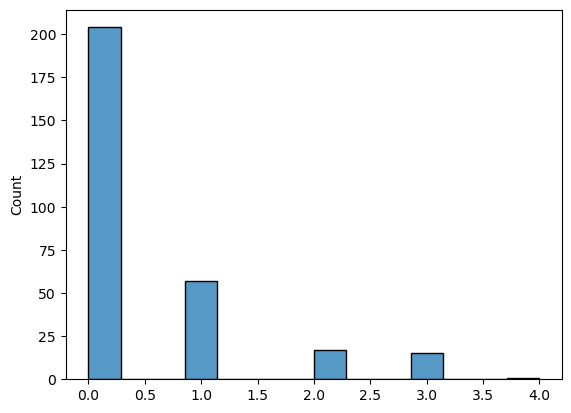

In [76]:
sns.histplot(sum)

In [77]:
# количество сложных только по lost_percentage
len(df_hard[(df_hard['lost_percentage']) & (~df_hard['mean_tries_count']) & (~df_hard['tries_std'] & (~df_hard['skips_percentage']) & (~df_hard['guessed_percentage']))])

13

In [78]:
# количество сложных только по skips_percentage
len(df_hard[(df_hard['skips_percentage']) & (~df_hard['mean_tries_count']) & (~df_hard['tries_std'] & (~df_hard['lost_percentage']) & (~df_hard['guessed_percentage']))])

22

In [79]:
# количество сложных только по guessed_percentage
len(df_hard[(df_hard['guessed_percentage']) & (~df_hard['mean_tries_count']) & (~df_hard['tries_std'] & (~df_hard['skips_percentage']) & (~df_hard['lost_percentage']))])

14

## Кластеризация

In [101]:
# заполним 0: незаполненные значения - начало новой темы
df_cluster = df_merged
df_cluster['lost_percentage'] = df_cluster['lost_percentage'].fillna(0)

### KMeans

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_cluster = scaler.fit_transform(df_cluster)

In [103]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n = list(range(2, 8))
scores = []
for n_clusters in n:
    kmeans = KMeans(n_clusters=n_clusters, random_state=43)
    score = silhouette_score(data_cluster, kmeans.fit_predict(data_cluster))
    scores.append(score)

<Axes: >

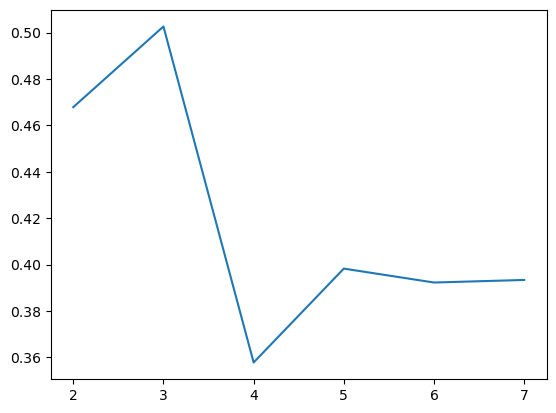

In [104]:
sns.lineplot(x=n, y=scores)

In [105]:
kmeans = KMeans(n_clusters=3, random_state=43)
clusters = list(kmeans.fit_predict(data_cluster))

In [106]:
df_cluster['cluster'] = clusters

In [107]:
df_cluster

,mean_tries_count,tries_std,skips_percentage,lost_percentage,guessed_percentage,cluster
course_element_id,,,,,,
22092,1.712821,1.081184,0.009169,0.118734,0.000000,1
22096,2.000000,1.664125,0.004890,0.248394,0.000000,1
22097,1.814516,0.948361,0.012225,0.000000,0.000000,1
22098,1.200573,0.572397,0.000000,0.025157,0.000000,1
22099,1.709972,1.519015,0.023994,0.000000,0.015954,1
...,...,...,...,...,...,...
34799,1.334936,0.666329,0.102390,0.573565,0.000000,2
34885,1.951389,1.308774,0.022308,0.259958,0.000000,1
34886,2.384146,1.715581,0.153846,0.387097,0.000000,2


In [108]:
pd.Series(kmeans.labels_).value_counts()

1    193
0     74
2     27
Name: count, dtype: int64

In [109]:
df_cluster.groupby('cluster').mean()

,mean_tries_count,tries_std,skips_percentage,lost_percentage,guessed_percentage
cluster,,,,,
0,6.162112,6.434282,0.078211,0.045043,0.163983
1,2.253643,1.809972,0.072478,0.040843,0.013102
2,2.471025,1.721416,0.120108,0.519608,0.004025


In [110]:
df_cluster.groupby('cluster').median()

,mean_tries_count,tries_std,skips_percentage,lost_percentage,guessed_percentage
cluster,,,,,
0,5.053111,5.902799,0.064038,0.024050,0.163498
1,1.761905,1.439999,0.036797,0.008230,0.002217
2,1.976127,1.359987,0.082853,0.524178,0.000000
